In [51]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

# TIME_FRAMES = 50
BUFFER_SIZE = 100
# AMOUNT_OF_FRAMES = TIME_FRAMES - BUFFER_SIZE + 1
# AMOUNT_OF_VIDEOS = int(input("amount of videos: "))

WIDTH = 1280
HEIGHT = 720

frame_sq = []
frame_sq_gray = []
frame_sq_edges = []

# dataset_no = input("starting number: ")
video_count = 0
                    



# rgb = np.ndarray((TIME_FRAMES - (TIME_FRAMES % BUFFER_SIZE), 3))



In [52]:
def compare_img(img1,img2):
    img1 = normalize_gray(img1)
    img2 = normalize_gray(img2)
    diff = img1 - img2
    m_norm = np.sum(abs(diff))
#     return m_norm
    return 0
def normalize_frame(frame):
    return frame/255

def normalize_gray(frame):
    rng = np.max(frame) - np.min(frame)
    amin = np.min(frame)
    return (frame-amin)/rng #range from [0,1]
def createDataset(data):
#     dataset = data[0].copy()
#     dataset.remove(dataset[0])
#     for datum in data:
#         dataset = np.append(dataset, datum, axis = 1)
#     result  = np.append(data[0],np.append(dataset[1],np.append(dataset[2],dataset[3],axis=1),axis=1),axis=1)
    result = np.append(h,np.append(s,np.append(v,opticFlow,axis=1),axis=1),axis=1)
    return result
def createTSV(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "dataset" + str(dataset_no) + ".tsv"
    datasetName = filename + ".tsv"
    file = open(datasetName, "w")
#     file.write("h\ts\tv\tframe_edges_comp\tframe_comp\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return
def createTSVLabel(dataset,filename):
    dataset = (dataset.copy()).astype(str)
#     datasetName = "label" + str(dataset_no) + ".tsv"
    datasetName = filename
    file = open(datasetName, "w")
    file.write("havg\thv\tsavg\tsv\tvavg\tvv\tmagavg\tmagv\tangavg\tangv\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return


<h1>Normalization</h1>

In [53]:
def createCSV(dataset,filename):
#     dataset = (dataset.copy()).astype(str)
#     dataset_name = "dataset" + str(dataset_no) + ".csv"
    dataset_name = filename + ".csv"
    csv = open(dataset_name, "w")
#     columnTitleRow = "havg,hv,savg,sv,vavg,vv,magavg,magv,angavg,angv\n"
#     csv.write(columnTitleRow)
    for i in range(len(dataset)):
#         csv.write(",".join(dataset[i,:].tolist()))
        csv.write(",".join([str(v) for v in dataset[i].astype(str).tolist()]))
#         csv.write("\n")
    csv.close()

<h1>STORE VIDEOS</h1>

In [ ]:
import os
import cv2
import sys

directory_name = input("directory name: ")
os.makedirs(directory_name)

BUFFER_SIZE = 100
# AMOUNT_OF_VIDEOS = 70
RECORD_AMOUNT = 20
video_count = 91

for i in range(RECORD_AMOUNT + 1):
#     print("recording video " + str(video_count) + "...")
    sys.stdout.write("\r" + "recording video " + str(video_count) + "...")
    sys.stdout.flush()
    cap = cv2.VideoCapture(0)
    WIDTH = int(cap.get(3))
    HEIGHT = int(cap.get(4))
    video_name = directory_name + "/" + str(video_count) + ".avi"
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(directory_name + "/" + str(video_count) + '.avi',fourcc, 20.0, (640,480))
    frame_counter = 0
    while(True):
        ret, frame = cap.read()
        if (ret == True):
            out.write(frame)
#             cv2.imshow('frame',frame)
            frame_counter += 1
        if (frame_counter == BUFFER_SIZE): break
    video_count += 1
#     tmp = input("press enter to continue")
    cap.release()
    cv2.destroyAllWindows()
    tmp = input("press Enter")
video_count = 0

    
    

<h1>ANALYZE VIDEOS + PREPROCESSING</h1>

In [134]:
import os
import sys

def get_data(directory,x = 0):
    directory = "../" + directory
    vids = os.listdir(directory)
    BUFFER_SIZE = 100
    DILATION_FACTOR = 3
    tmp = np.arange(int(x),len(vids) - 1 + int(x))
    videos = [name + '.avi' for name in (tmp.astype(str)).tolist()]
    videos = [directory + "/" + name for name in videos]
    video_count = 0
    AMOUNT_OF_VIDEOS = len(videos) - 1

    WIDTH = 0
    HEIGHT = 0

    video_list = []

    opticflow_buffer = []

    print("then")
    while(video_count < len(videos)-1):
    # while(True):
        sys.stdout.write("\r" + "video " + str(videos[video_count]) + "...")
        sys.stdout.flush()
        cap = cv2.VideoCapture(videos[video_count])
        frame_count = 0
        data_count = 0
        ret, frame = cap.read()
        HEIGHT = frame.shape[0]
        WIDTH = frame.shape[1]
        cap.release()
        data_frame = np.ndarray((((BUFFER_SIZE - 1) // DILATION_FACTOR), HEIGHT//10, WIDTH//10, 5))
        cap = cv2.VideoCapture(videos[video_count])
        for i in range (BUFFER_SIZE):
            ret, frame = cap.read()
            frame = cv2.resize(frame, (0,0), fx=0.1, fy=0.1)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            opticflow_buffer.append(gray)
            if(len(opticflow_buffer) == 2):
                hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
                hsv = np.subtract(np.multiply(np.divide(hsv,255),2),1)
                flow = cv2.calcOpticalFlowFarneback(opticflow_buffer[0],opticflow_buffer[1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
                mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
                mag = cv2.normalize(mag,None,-1,1,cv2.NORM_MINMAX)
                ang = (ang*180/np.pi/2/180) - 1
                del opticflow_buffer[0]
                if(frame_count % DILATION_FACTOR == 0):
                    tmp = np.ndarray((48,64,2))
                    tmp[:,:,0] = mag
                    tmp[:,:,1] = ang
                    data_frame[data_count, :, :, 0:3] = hsv
                    data_frame[data_count, :, :, 3:5] = tmp
                    data_count += 1
                frame_count += 1
        video_list.append(data_frame)
        cap.release()
        cv2.destroyAllWindows()
        opticflow_buffer = []
        video_count += 1
    cv2.destroyAllWindows()
    return np.asarray(video_list)

In [135]:
def gen_data():
    dataset = []
    labels = []
    counter = 0
    folders = ['doit3','addition','addition2','addition3']
    inits = [0,71,91,91]
#     while(True):
    for i in range(len(folders)):
#         directory = input("Folder name: ")
#         x = input("init: ")
        directory = folders[i]
        x = inits[i]
        if(directory == ""): break
        datum = get_data(directory,x)
        if(counter == 0):
            dataset = datum
            counter += 1
        else:
            dataset = np.append(dataset, datum, axis = 0)
    return dataset
def appendLabels():
    paths = ['label4.tsv','labeladdition.tsv','labeladdition2.tsv','labeladditional3.tsv']
    labels = []
    pathName = input("Path name: ")
    pathName = "../"
#     while(True):
    for fileName in paths:
#         fileName = input("File name: ")
        if(fileName == ""):
            break
        with open(pathName + fileName) as f:
            lines = f.readlines()
        for line in lines:
            labels.append(line[:-1])
    return labels
    

In [136]:
dataset = gen_data()

then
video ../doit3/68.avi...then
video ../addition/88.avi...then
video ../addition2/129.avi...then
video ../addition3/102.avi...

In [64]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9232056197712235013
]


In [138]:
labels = appendLabels()

In [139]:
print(dataset.shape)
print(len(labels))

(138, 33, 48, 64, 5)
138


In [76]:
#nomalize opticflow
from sklearn.preprocessing import StandardScaler
dataset = np.nan_to_num(dataset)
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(dataset[:,:,:,:,3].reshape(1,dataset.shape[0] * dataset.shape[1] 
                                      * dataset.shape[2] * dataset.shape[3]))
scaler2.fit(dataset[:,:,:,:,4].reshape(1,dataset.shape[0] * dataset.shape[1] 
                                      * dataset.shape[2] * dataset.shape[3]))

/home/bon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/bon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
import pickle
pickle.dump( scaler1, open( "mag_scaler.p", "wb" ) )
pickle.dump( scaler2, open( "ang_scaler.p", "wb" ) )

In [140]:
AMOUNT_OF_CLASSES = 7
TRAIN_RATIO = 0.8
def loadLabel(dataset, labels):
    all_labels = np.zeros((len(labels), AMOUNT_OF_CLASSES))
    label_counter = 0
    per_label = [0] * AMOUNT_OF_CLASSES
    for label in labels:
        tmp = np.zeros((1,AMOUNT_OF_CLASSES))
        if (label == "static"):
            tmp[0,0] = 1
            per_label[0] += 1
        elif (label == "move"):
            tmp[0,1] = 1
            per_label[1] += 1
        elif (label == "rot"):
            tmp[0,2] = 1
            per_label[2] += 1            
        elif (label == "frot"):
            tmp[0,3] = 1
            per_label[3] += 1
        elif (label == "light"):
            tmp[0,4] = 1
            per_label[4] += 1
        elif (label == "dynamiclight"):
            tmp[0,5] = 1
            per_label[5] += 1
        else:
            tmp[0,6] = 1
            per_label[6] += 1
        all_labels[label_counter,:] = tmp
        label_counter += 1
    dataset, all_labels = shuffle(dataset, all_labels, random_state=1)
    return assignData(dataset, all_labels)

In [141]:
from sklearn.utils import shuffle
def assignData(data,labels):
    UNKNOWN_AMOUNT = 5
    train_amount = int(data.shape[0] * TRAIN_RATIO)
    AMOUNT_PER_CLASS = int((data.shape[0] - UNKNOWN_AMOUNT) * TRAIN_RATIO)
    class_count = [0] * train_amount
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []
    for i in range (data.shape[0]):
        if(len(train_data) == train_amount):
            test_data.append(data[i])
            test_labels.append(labels[i])
        else:
            index = np.argmax(labels[i])
            if(index == AMOUNT_OF_CLASSES - 1):
                test_data.append(data[i])
                test_labels.append(labels[i])
            if( class_count[index] < AMOUNT_PER_CLASS) :
                train_data.append(data[i])
                train_labels.append(labels[i])
                class_count[index] += 1
            else:
                test_data.append(data[i])
                test_labels.append(abels[i])
    return np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)
                    

In [142]:
from sklearn.utils import shuffle
def assignData_kfolds(data,labels,k=5,iteration=0):
    UNKNOWN_AMOUNT = 5
#     train_amount = int(data.shape[0] * TRAIN_RATIO)
    train_amount = data.shape[0]//k
    class_count = [0] * train_amount
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    train_data = data[k * 0 : k * 0 + train_amount, :]
    train_labels = labels[k * 0 : k * 0 + train_amount, :]
    test_data_front = data[0 : k * 0, :]
    test_data_back = data[k * 0 + train_amount :, :]
    test_labels_front = labels[0 : k * 0, :]
    test_labels_back = labels[k * 0 + train_amount :, :]
    print(test_data_front.shape)
    print(test_data_back.shape)
    test_data = np.append(test_data_front, test_data_back, axis = 0)
    test_labels = np.append(test_labels_front, test_labels_back, axis = 0)
    return np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)
                    

In [143]:
AMOUNT_OF_CLASSES = 7
TRAIN_RATIO = 0.8
def train_kfolds(dataset, labels, k=5):
    all_labels = np.zeros((len(labels), AMOUNT_OF_CLASSES))
    label_counter = 0
    per_label = [0] * AMOUNT_OF_CLASSES
    for label in labels:
        tmp = np.zeros((1,AMOUNT_OF_CLASSES))
        if (label == "static"):
            tmp[0,0] = 1
            per_label[0] += 1
        elif (label == "move"):
            tmp[0,1] = 1
            per_label[1] += 1
        elif (label == "rot"):
            tmp[0,2] = 1
            per_label[2] += 1            
        elif (label == "frot"):
            tmp[0,3] = 1
            per_label[3] += 1
        elif (label == "light"):
            tmp[0,4] = 1
            per_label[4] += 1
        elif (label == "dynamiclight"):
            tmp[0,5] = 1
            per_label[5] += 1
        else:
            tmp[0,6] = 1
            per_label[6] += 1
        all_labels[label_counter,:] = tmp
        label_counter += 1
    dataset, all_labels = shuffle(dataset, all_labels, random_state=1)
    acc_sum = 0
    for iteration in range (k):
        x_train, x_test, y_train, y_test = assignData_kfolds(dataset, all_labels, 5, iteration)
        model = gen_model()
        opti = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss='categorical_crossentropy',optimizer=opti,metrics=['accuracy'])
        model.fit(x_train, y_train, batch_size=4, epochs=15, verbose=1)
        score = model.evaluate(x_test, y_test, batch_size = 4, verbose=0)
        print("iteration " + str(iteration) + "score :")
        print(score)
        acc_sum += score[1]
    print("average score: ", acc_sum / k)
    return

In [156]:
train_kfolds(dataset, labels, 5)

(0, 33, 48, 64, 5)
(111, 33, 48, 64, 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_35 (Conv3D)           (None, 29, 44, 60, 20)    12520     
_________________________________________________________________
max_pooling3d_35 (MaxPooling (None, 14, 22, 30, 20)    0         
_________________________________________________________________
conv3d_36 (Conv3D)           (None, 10, 18, 26, 50)    125050    
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 5, 9, 13, 50)      0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 29250)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               3744128   
_________________________________________________________________
dense_36 (Dense)             (None, 

In [144]:
x_train, x_test, y_train, y_test = loadLabel(dataset,labels)

In [145]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(110, 33, 48, 64, 5)
(110, 7)
(32, 33, 48, 64, 5)
(32, 7)


In [84]:
print(x_train[0,0].shape)
print(x_train.shape)

(48, 64, 5)
(110, 11, 48, 64, 5)


In [149]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.utils import np_utils
from keras import optimizers

def gen_model():
    
    model = Sequential()
    model.add(Convolution3D(20,(5,5,5),strides=1,data_format='channels_last',input_shape = (33,48,64,5),activation='relu'))
#     model.add(Dropout(0.5))
    model.add(MaxPooling3D(pool_size=(2,2,2), padding='VALID'))
    model.add(Convolution3D(50,(5,5,5),strides=1,data_format='channels_last',activation='relu'))
# # #     model.add(Dropout(0.5))
    model.add(MaxPooling3D(pool_size=(2,2,2), padding='VALID'))
# #     model.add(Convolution3D(70,(2,5,5),strides=1,activation='relu'))
# #     model.add(Dropout(0.5))
    model.add(Flatten())
#     model.add(Dense(2048, activation='relu'))
    model.add(Dense(128, activation='relu'))
#     model.add(Dense(512, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    print(model.summary())
    return model

    

In [150]:
model = gen_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_33 (Conv3D)           (None, 29, 44, 60, 20)    12520     
_________________________________________________________________
max_pooling3d_33 (MaxPooling (None, 14, 22, 30, 20)    0         
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 10, 18, 26, 50)    125050    
_________________________________________________________________
max_pooling3d_34 (MaxPooling (None, 5, 9, 13, 50)      0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 29250)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               3744128   
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 903       
Total para

In [151]:
opti = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=opti,
              metrics=['accuracy'])

In [152]:
model.fit(x_train, y_train, 
          batch_size=4, epochs=15, verbose=1)

Epoch 1/15
110/110 [==============================] - 54s 492ms/step - loss: 2.7284 - acc: 0.2455
Epoch 2/15
110/110 [==============================] - 54s 490ms/step - loss: 1.3456 - acc: 0.5182
Epoch 3/15
110/110 [==============================] - 54s 486ms/step - loss: 1.5611 - acc: 0.4909
Epoch 4/15
110/110 [==============================] - 53s 478ms/step - loss: 1.0120 - acc: 0.6364
Epoch 5/15
110/110 [==============================] - 54s 491ms/step - loss: 0.6878 - acc: 0.7909
Epoch 6/15
110/110 [==============================] - 54s 487ms/step - loss: 0.6226 - acc: 0.7727
Epoch 7/15
110/110 [==============================] - 54s 489ms/step - loss: 0.4546 - acc: 0.8818
Epoch 8/15
110/110 [==============================] - 54s 488ms/step - loss: 0.4543 - acc: 0.8727
Epoch 9/15
110/110 [==============================] - 54s 489ms/step - loss: 0.3723 - acc: 0.8455
Epoch 10/15
110/110 [==============================] - 54s 491ms/step - loss: 0.1560 - acc: 0.9636
Epoch 11/15
110/110

In [ ]:
model.fit(x_train, y_train, 
          batch_size=4, epochs=20, verbose=1)

In [153]:
layer = model.layers[1]

In [154]:
print(layer.input_shape)

(None, 29, 44, 60, 20)


In [42]:
from sklearn.metrics import f1_score
def f1_score():
# for datum in range (x_test.shape[0]):
    preds_test = [argmax(model.predict(x)) for x in da]


In [155]:
score = model.evaluate(x_test, y_test, batch_size = 4, verbose=0)
print(score)

[2.8871650837827474, 0.65625]


In [56]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess)

In [ ]:
definition = ['static', 'move', 'rot', 'frot', 'light', 'dynamiclight','unknown']

for test_num in range (50):
#     lol = normalize(train_data[test_num].reshape(1,-1))
    lol = x_test[test_num].reshape(1,11,48,64,5)
    lol_label = y_test[test_num]
    # print(lol.shape)
    # print(lol, lol_label)
    prediction = model.predict(lol)
    print(definition[np.argmax(prediction[0])])
    print(definition[np.argmax(lol_label)])
    print("-----------------------------------------------")

In [108]:
preds_test = []
ground_test = []
preds_train = []
ground_train = []

for i in range (x_test.shape[0]):
    datum = x_test[i].reshape(1,11,48,64,5)
    ground_test.append(np.argmax(y_test[i,:]))
    preds_test.append(np.argmax(model.predict(datum)[0]))
for i in range (x_train.shape[0]):
    datum = x_train[i].reshape(1,11,48,64,5)
    ground_train.append(np.argmax(y_train[i,:]))
    preds_train.append(np.argmax(model.predict(datum)[0]))

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.8  0.2  0.   0.   0.   0.  ]
 [0.   0.   0.   0.6  0.2  0.   0.2 ]
 [0.   0.   0.4  0.6  0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.75 0.  ]
 [0.   0.   0.   0.   0.33 0.   0.67]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


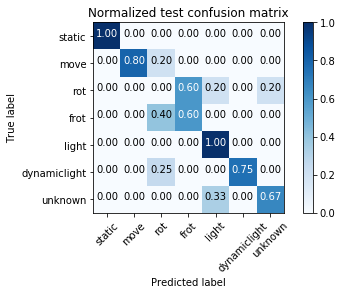

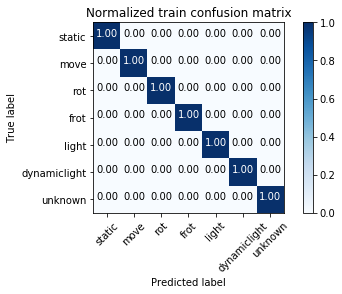

In [109]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cnf_matrix_test = confusion_matrix(ground_test, preds_test)
cnf_matrix_train = confusion_matrix(ground_train, preds_train)
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=definition,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_test, classes=definition, normalize=True,
                      title='Normalized test confusion matrix')

plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=definition, normalize=True,
                      title='Normalized train confusion matrix')

plt.show()